<a href="https://colab.research.google.com/github/M4th010/CalculoNumerico/blob/main/Sistemas_lineares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

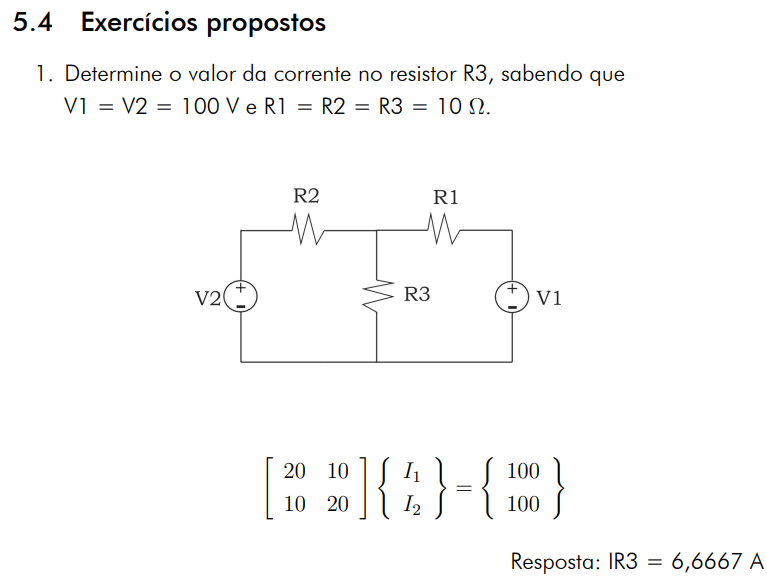

In [ ]:
import numpy as np

def DecomposiçãoLU(A, b):  # cria-se a função do método
    m = len(A)
    y = np.zeros(m)
    x = np.zeros(m)
    U = A
    L = np.zeros([m, m])
    for k in range(0, m):
        for r in range(0, m):
            if (k == r):
                L[k, r] = 1
            if (k < r):
                factor = (A[r, k]/A[k, k])
                L[r, k] = factor
                for c in range(0, m):
                    U[r, c] = A[r, c] - (factor * A[k, c])
    A = np.zeros([m, m])
    for r in range(0, m):
        for c in range(0, m):
            for k in range(0, m):
                A[r, c] += (L[r, k] * U[k, c])
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(U, y)
    print(f'A resposta é: {x[0]+x[1]}')

# Uso do método
A = np.array([[20, 10],
              [10, 20]])
b = np.transpose([100, 100])
DecomposiçãoLU(A, b)

A resposta é: 6.666666666666666


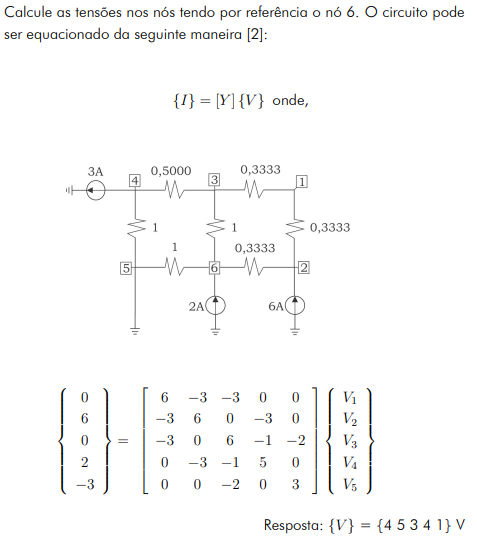

In [ ]:
from numpy import array, zeros


def Gauss_Seidel(matriz_aumentada, vetor):  # função do método
    m = len(matriz_aumentada)
    n = len(matriz_aumentada[0])
    x = zeros((m))
    comp = zeros((m))
    error = []
    TOL = 0.0002  # erro tolerado
    maxit = 5000
    k = 0
    while k < maxit:
        suma = 0
        k = k + 1
        #print(f'Iteração: {k}')
        for r in range(0, m):
            suma = 0
            for c in range(0, n):
                if (c != r):
                    suma = suma+matriz_aumentada[r, c] * x[c]
            x[r] = (vetor[r]-suma)/matriz_aumentada[r, r]
            #print(f'x[{r}]: {x[r]}')
        del error[:]
        for r in range(0, m):
            suma = 0
            for c in range(0, n):
                suma = suma+matriz_aumentada[r, c] * x[c]
            comp[r] = suma
            dif = abs(comp[r]-vetor[r])
            error.append(dif)
            #print(f'Erro em x[{r}] = {error[r]}')
        if all(i <= TOL for i in error) is True:
            break
    print(f'Com {k} iterações.')
    for c in range(0, m):
        print(f'x[{c}]: {int(x[c])}')

# Uso do método
matriz_aumentada = array([[6, -3, -3, 0, 0],
                          [-3, 6, 0, -3, 0],
                          [-3, 0, 6, -1, -2],
                          [0, -3, -1, 5, 0],
                          [0, 0, -2, 0, 3]], int)
vetor = array([[0],
               [6],
               [0],
               [2],
               [-3]])
Gauss_Seidel(matriz_aumentada, vetor)

Com 75 iterações.
x[0]: 3
x[1]: 4
x[2]: 2
x[3]: 3
x[4]: 0
